In [1]:
from cosmology.cosmoparams import Planck2015
from cmbfisher import CMBExperiment, CMBFisher
import numpy as np

In [49]:
p15 = Planck2015()
expt = CMBExperiment(name="Planck")
cmbfisher = CMBFisher(expt, planck15, 
                     params = ["n", "As", "tau", "H0", "Oc0", "Ob0"],
                     param_values = [p15.n, p15.As, p15.tau, p15.H0, p15.Oc0, p15.Ob0],
                     param_names = ['$n_s$', '$A_s$', r'$\tau$', '$H_0$', '$O_c$', '$O_b$'])

In [50]:
cmbfisher.include_polarization = False
cmbfisher.Cl_covmat_computed = False # recompute just in case 
fm = cmbfisher.fisher();
cmbfisher.covariance();

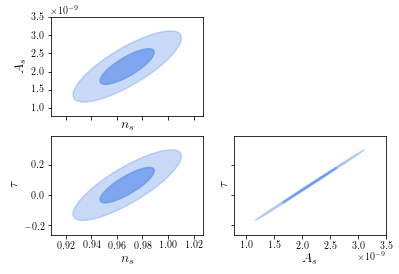

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

cmbfisher.plot_error_matrix([0,1,2])

In [52]:
cmbfisher.include_polarization = True
cmbfisher.Cl_covmat_computed = False # recompute for pol
fmwp = cmbfisher.fisher()
cmbfisher.covariance();

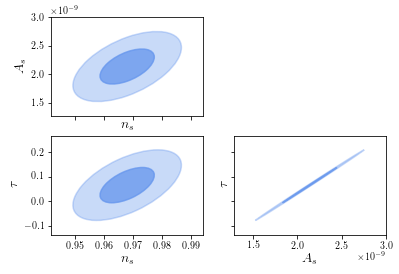

In [53]:
cmbfisher.plot_error_matrix([0,1,2])